# Reducing Commercial Aviation Fatalities

#### Can you tell when a pilot is heading for trouble?



## Problem Statement
build a model to detect troubling events from aircrew’s physiological data.

## DataOverview

In this dataset, you are provided with real physiological data from eighteen pilots who were subjected to various distracting events.The benchmark training set is comprised of a set of controlled experiments collected in a non-flight environment, outside of a flight simulator

**Channelized Attention (CA)** is, roughly speaking, the state of being focused on one task to the exclusion of all others. This is induced in benchmarking by having the subjects play an engaging puzzle-based video game.

**Diverted Attention (DA)** is the state of having one’s attention diverted by actions or thought processes associated with a decision. This is induced by having the subjects perform a display monitoring task. Periodically, a math problem showed up which had to be solved before returning to the monitoring task.
**Startle/Surprise (SS)** is induced by having the subjects watch movie clips with jump scares.



### Feature Names


Variables with the eeg prefix are electroencephalogram recordings.

id - A unique identifier for a crew + time combination. You must predict probabilities for each id.

crew - a unique id for a pair of pilots. There are 9 crews in the data.

experiment - One of CA, DA, SS or LOFT. The first 3 comprise the training set. The latter the test set.

time - seconds into the experiment

seat - is the pilot in the left (0) or right (1) seat

eeg_fp1

eeg_f7

eeg_f8

eeg_t4

eeg_t6

eeg_t5

eeg_t3

eeg_fp2

eeg_o1

eeg_p3

eeg_pz

eeg_f3

eeg_fz

eeg_f4

eeg_c4

eeg_p4

eeg_poz

eeg_c3

eeg_cz

eeg_o2

ecg - 3-point Electrocardiogram signal. The sensor had a resolution/bit of .012215 µV and a range of -100mV to +100mV. The data are provided in microvolts.

r - Respiration, a measure of the rise and fall of the chest. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.

gsr - Galvanic Skin Response, a measure of electrodermal activity. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.

event - The state of the pilot at the given time: one of A = baseline, B = SS, C = CA, D = DA

# 1.0 Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Reading data 

In [ ]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [ ]:
test_df.head()

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [ ]:
print("Number of train dataset ",len(train_df))
print("Number of test dataset ",len(test_df))

Number of train dataset  4867421
Number of test dataset  17965143


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
 #   Column      Dtype  
---  ------      -----  
 0   crew        int64  
 1   experiment  object 
 2   time        float64
 3   seat        int64  
 4   eeg_fp1     float64
 5   eeg_f7      float64
 6   eeg_f8      float64
 7   eeg_t4      float64
 8   eeg_t6      float64
 9   eeg_t5      float64
 10  eeg_t3      float64
 11  eeg_fp2     float64
 12  eeg_o1      float64
 13  eeg_p3      float64
 14  eeg_pz      float64
 15  eeg_f3      float64
 16  eeg_fz      float64
 17  eeg_f4      float64
 18  eeg_c4      float64
 19  eeg_p4      float64
 20  eeg_poz     float64
 21  eeg_c3      float64
 22  eeg_cz      float64
 23  eeg_o2      float64
 24  ecg         float64
 25  r           float64
 26  gsr         float64
 27  event       object 
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


we have given features type

* crew : is unique id for pair of pilots in integer.

* experiment : it is string object field where categorical data is saved.

* time: seconds into experiment type float 64.

* seat: value is 0 and 1 for left and right seat,type int64

* eeg_fp1,eeg_f7 ,eeg_f8 ,eeg_t4 ,eeg_t6 ,eeg_t5 ,eeg_t3 ,eeg_fp2,eeg_o1 ,eeg_p3 ,eeg_pz ,eeg_f3 ,eeg_fz ,eeg_f4 ,eeg_c4 ,eeg_p4 ,eeg_poz,eeg_c3 ,eeg_cz ,eeg_o2:These columns have EGG reading type float64

* ecg,r,gsr : have same physiological reading in numbers that's why type is : float64

* event :it is string object field where categorical data is saved.

## 1.2 Data Checks

### 1.2.1 Duplicate Checks

In [ ]:
print("Number of duplicate in train dataset : {} ".format(sum(train_df.duplicated())))
print("Number of duplicate in test dataset  : {} ".format(sum(test_df.duplicated())))

Number of duplicate in train dataset : 0 
Number of duplicate in test dataset  : 0 


### 1.2.2 Nan/Null checks

In [ ]:
print("We have {} NaN/Null values in train dataset ".format(train_df.isnull().values.sum()))
print("We have {} NaN/Null values in test dataset ".format(train_df.isnull().values.sum()))

We have 0 NaN/Null values in train dataset 
We have 0 NaN/Null values in test dataset 


# 2 . Distribution of data point amoung output classs



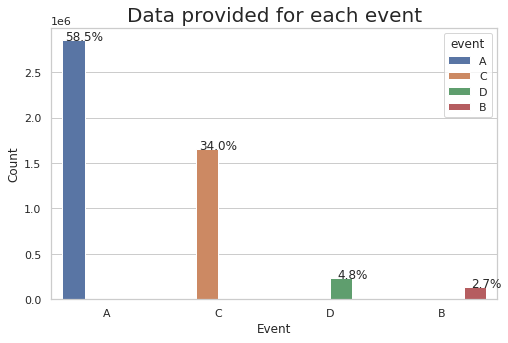

In [ ]:
# https://stackoverflow.com/a/31754317
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df))
ax = sns.countplot(x="event", hue="event", data=train_df)
plt.title('Data provided for each event', fontsize=20)
plt.xlabel("Event")
plt.ylabel("Count")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

We have imbalanced data for each event, In plot we can see percentage of every event is so much differnece

### 2.1 Experiment  count plot in train dataset

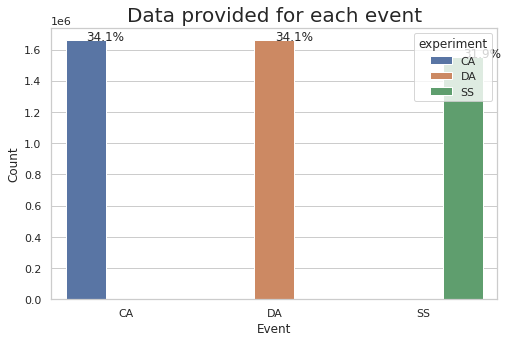

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df))
ax = sns.countplot(x="experiment", hue="experiment", data=train_df)
plt.title('Data provided for each experiments', fontsize=20)
plt.xlabel("Event")
plt.ylabel("Count")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

There is experiment in dataset on that event is happening.So that experiment are about balanced in training datsets

### 2.2 Count plot of Experiment in test dataset

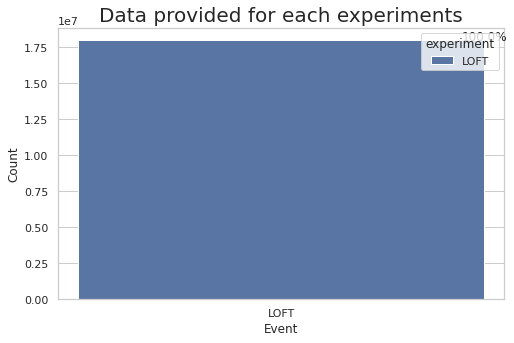

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(test_df))
ax = sns.countplot(x="experiment", hue="experiment", data=test_df)
plt.title('Data provided for each experiments', fontsize=20)
plt.xlabel("Event")
plt.ylabel("Count")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

LOFT = Line Oriented Flight Training in Test dataset

# 3.0 Data Visualization

### 3.1 Seat

On Which seat pilot is setting 1: right and 0 :left side 

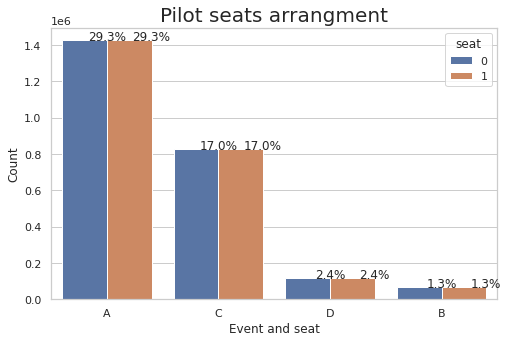

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_df))
ax = sns.countplot(x="event", hue="seat", data=train_df)
plt.title('Pilot seats arrangment', fontsize=20)
plt.xlabel("Event and seat")
plt.ylabel("Count")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

As we have seen data is imbalanced based on event accordingly there is seat for every event

### 3.2 Time of experiment


#### 3.2.1 Violin plot

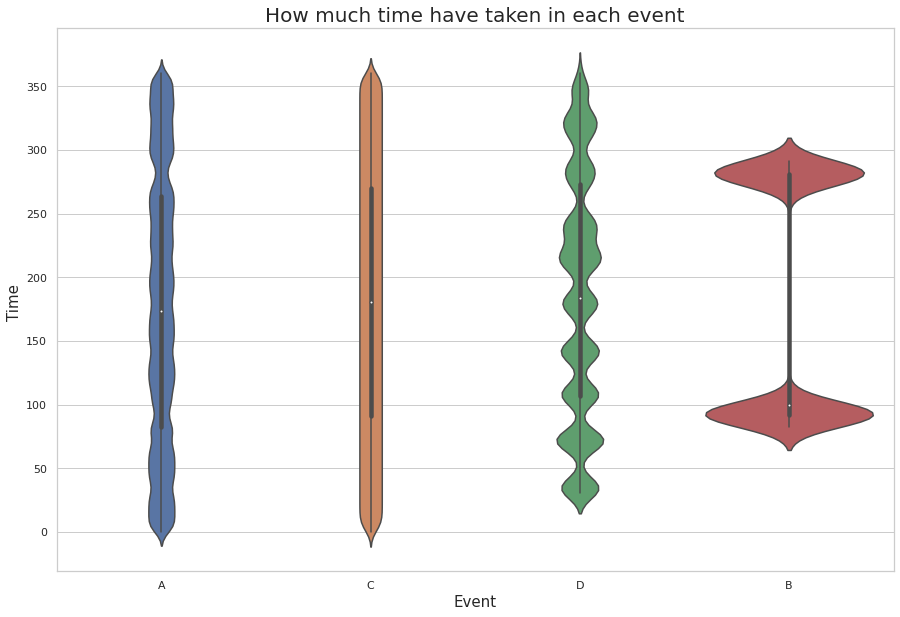

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='time', data=train_df)
plt.ylabel("Time ", fontsize=15)
plt.xlabel("Event", fontsize=15)
plt.title("How much time have taken in each event", fontsize=20)
plt.show()

From above plot we can understand that Event A,C,D have about to similar timeing but B timing event is different from others

#### 3.2.2 Time of experiment : Train and Test distribution plot

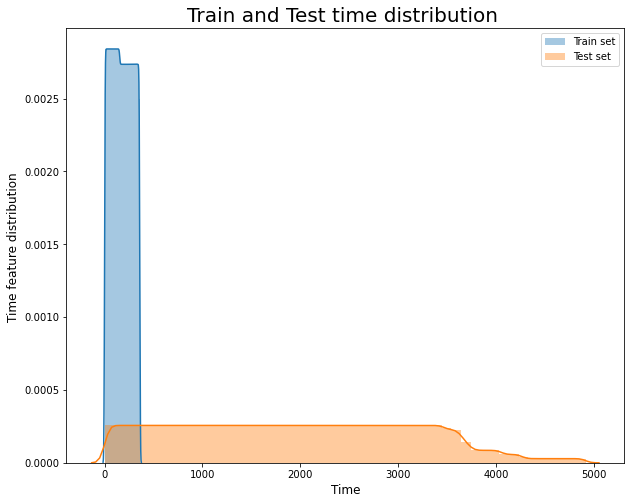

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(train_df['time'],label='Train set')
sns.distplot(test_df['time'],label='Test set')
plt.legend()
plt.title("Train and Test time distribution ",fontsize=20)
plt.xlabel("Time" ,fontsize=12)
plt.ylabel("Time feature distribution ",fontsize=12)
plt.show()

From above plot we can understand that there is huge differnece in Train and test time of experiement.So use of time in training time may make our prediction makes wrong direction. time in flight simulator nothing to do with time in experiment 

### 3.3 Electrogastrogram Reading  

In [ ]:
egg_features = ['eeg_fp1', 'eeg_f7', 'eeg_f8','eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3','eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz','eeg_c3', 'eeg_cz', 'eeg_o2']
print(len(egg_features))

20


#### 3.3.1 Electrogastrogram Reading  BOX plot

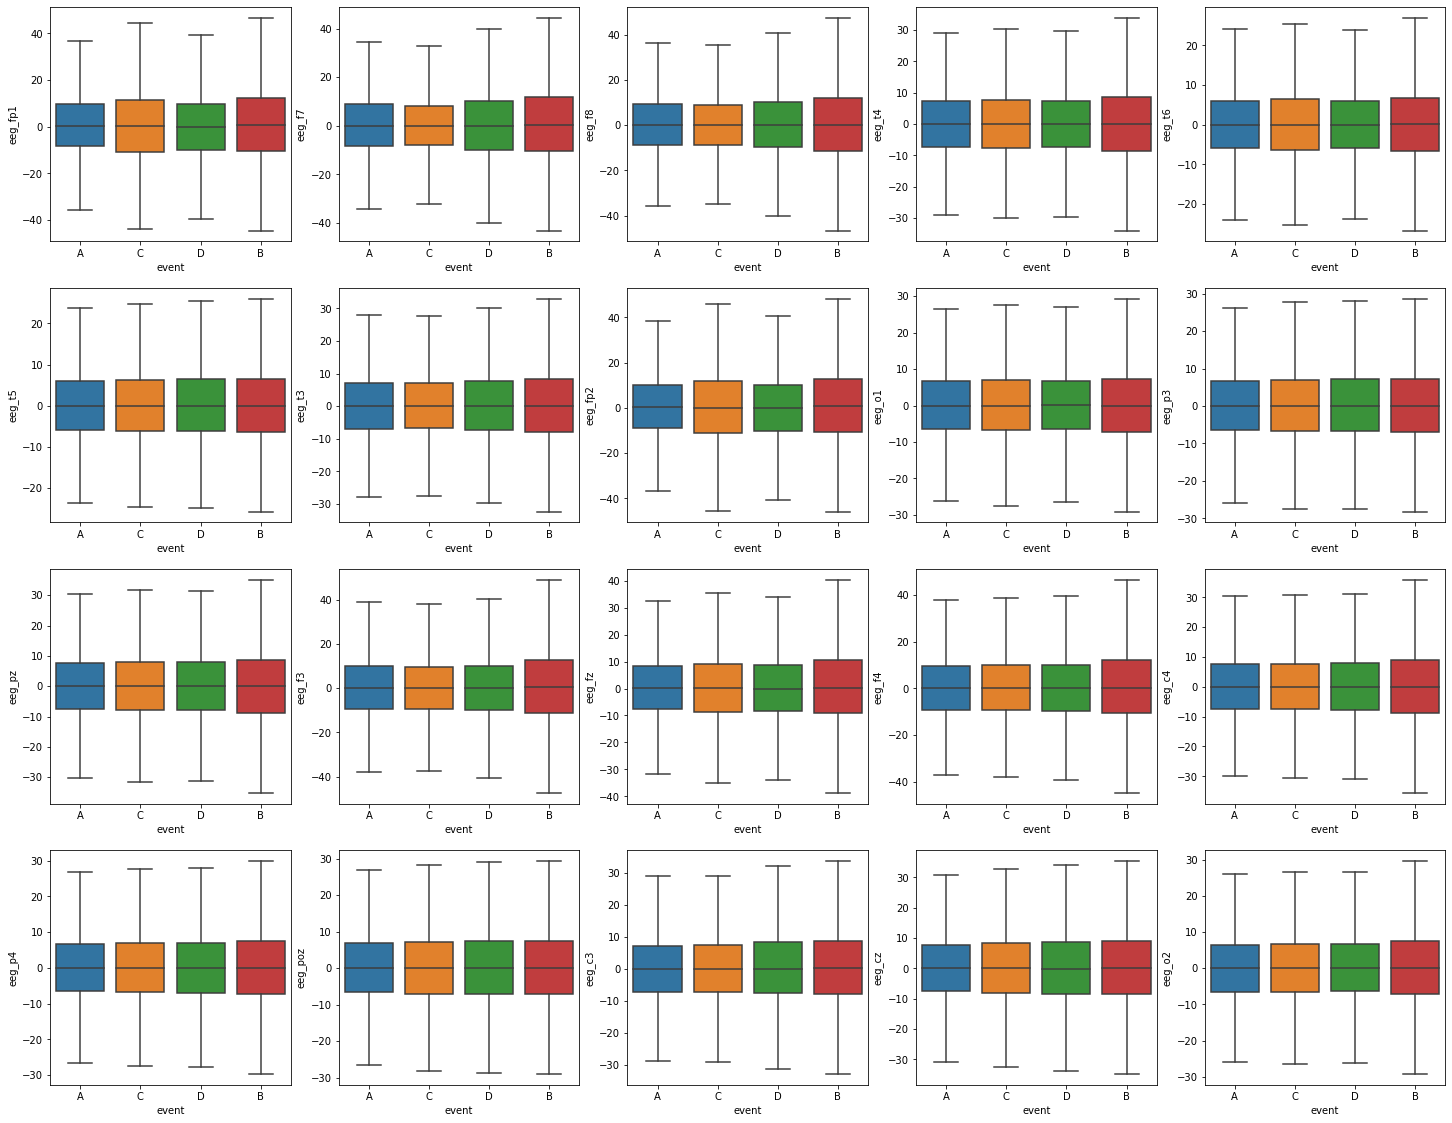

In [ ]:
plt.figure(figsize=(25,25))
plt.title("All EGG Reading Box Plot ",fontsize=20)
for i,egg in enumerate(egg_features):
    plt.subplot(5,5,i+1)
    sns.boxplot(x='event',y=egg,data=train_df,showfliers=False)
plt.show()

In above plot we can see that EGG all reading have about same on all event.

#### 3.3.2 EGG Signals view when Event A is Occur

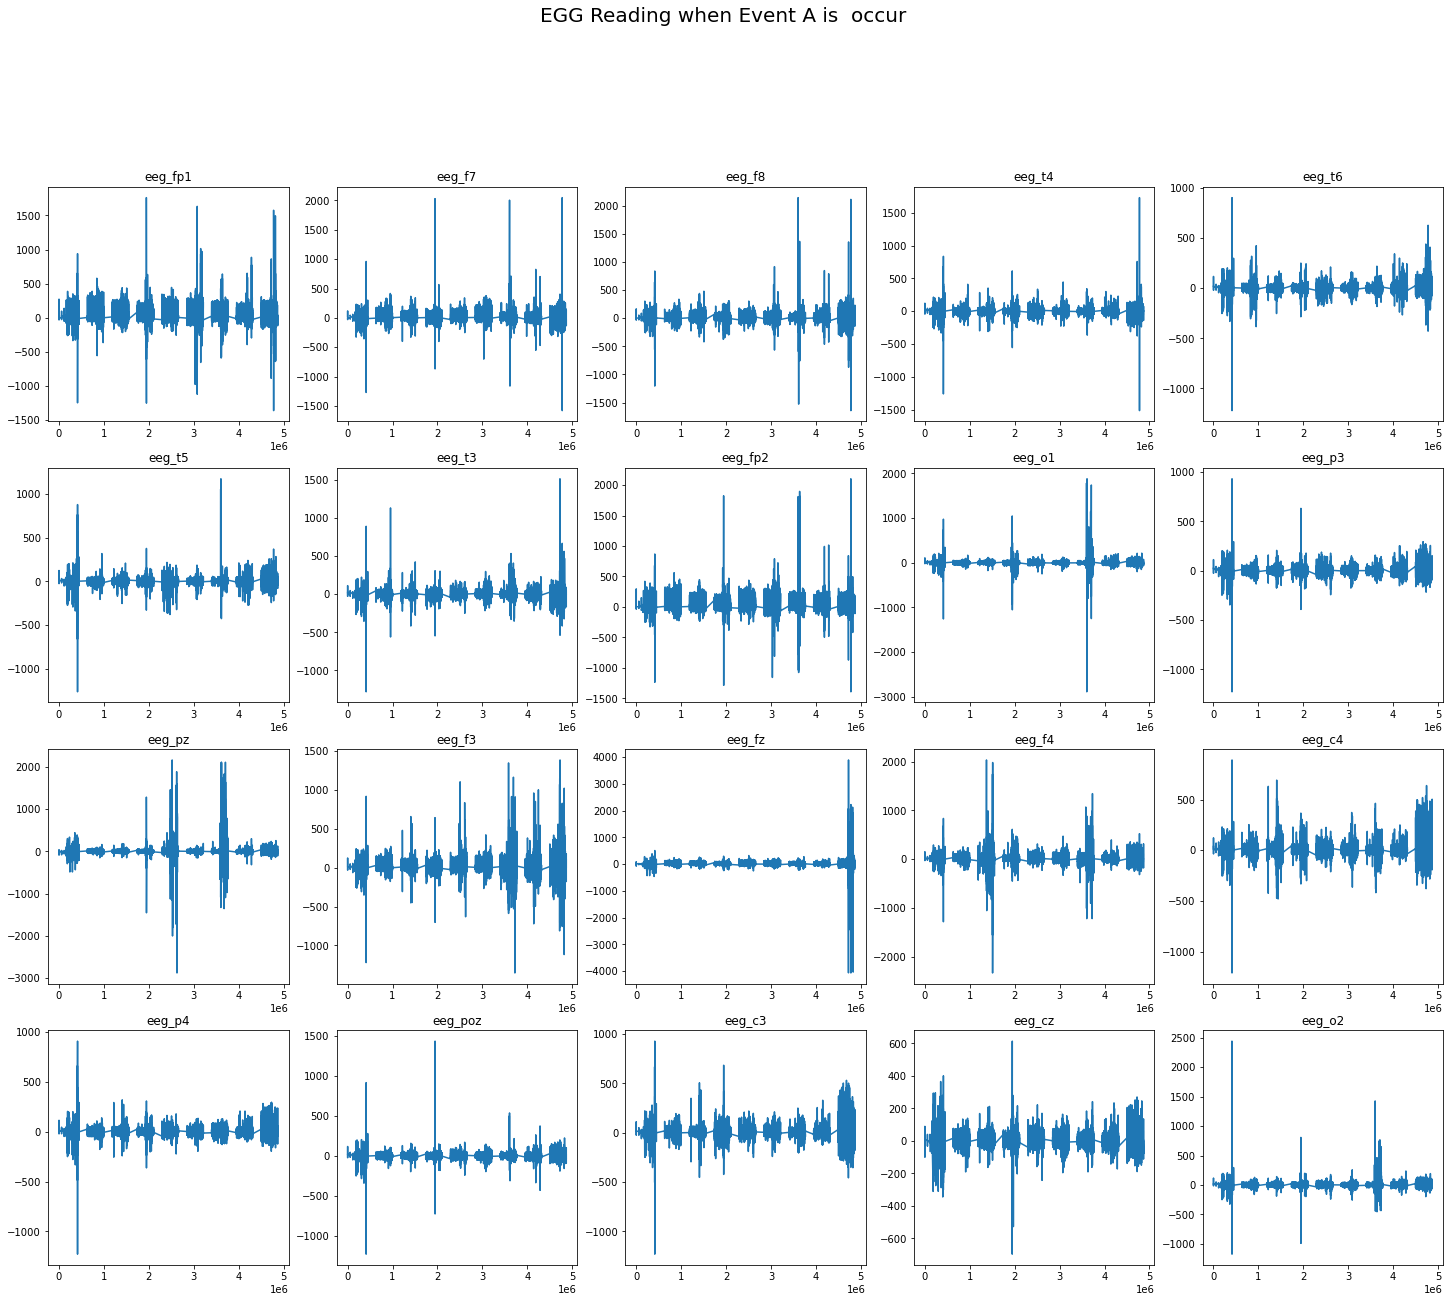

In [ ]:
fig=plt.figure(figsize=(25,25))
for i,egg in enumerate(egg_features):
    plt.subplot(5,5,i+1)
    plt.title(egg)
    plt.plot(train_df.loc[train_df['event']=='A'][egg])
fig.suptitle("EGG Reading when Event A is  occur",fontsize=20)
plt.show()

#### 3.3.3 EGG Signals view when Event B is Occur

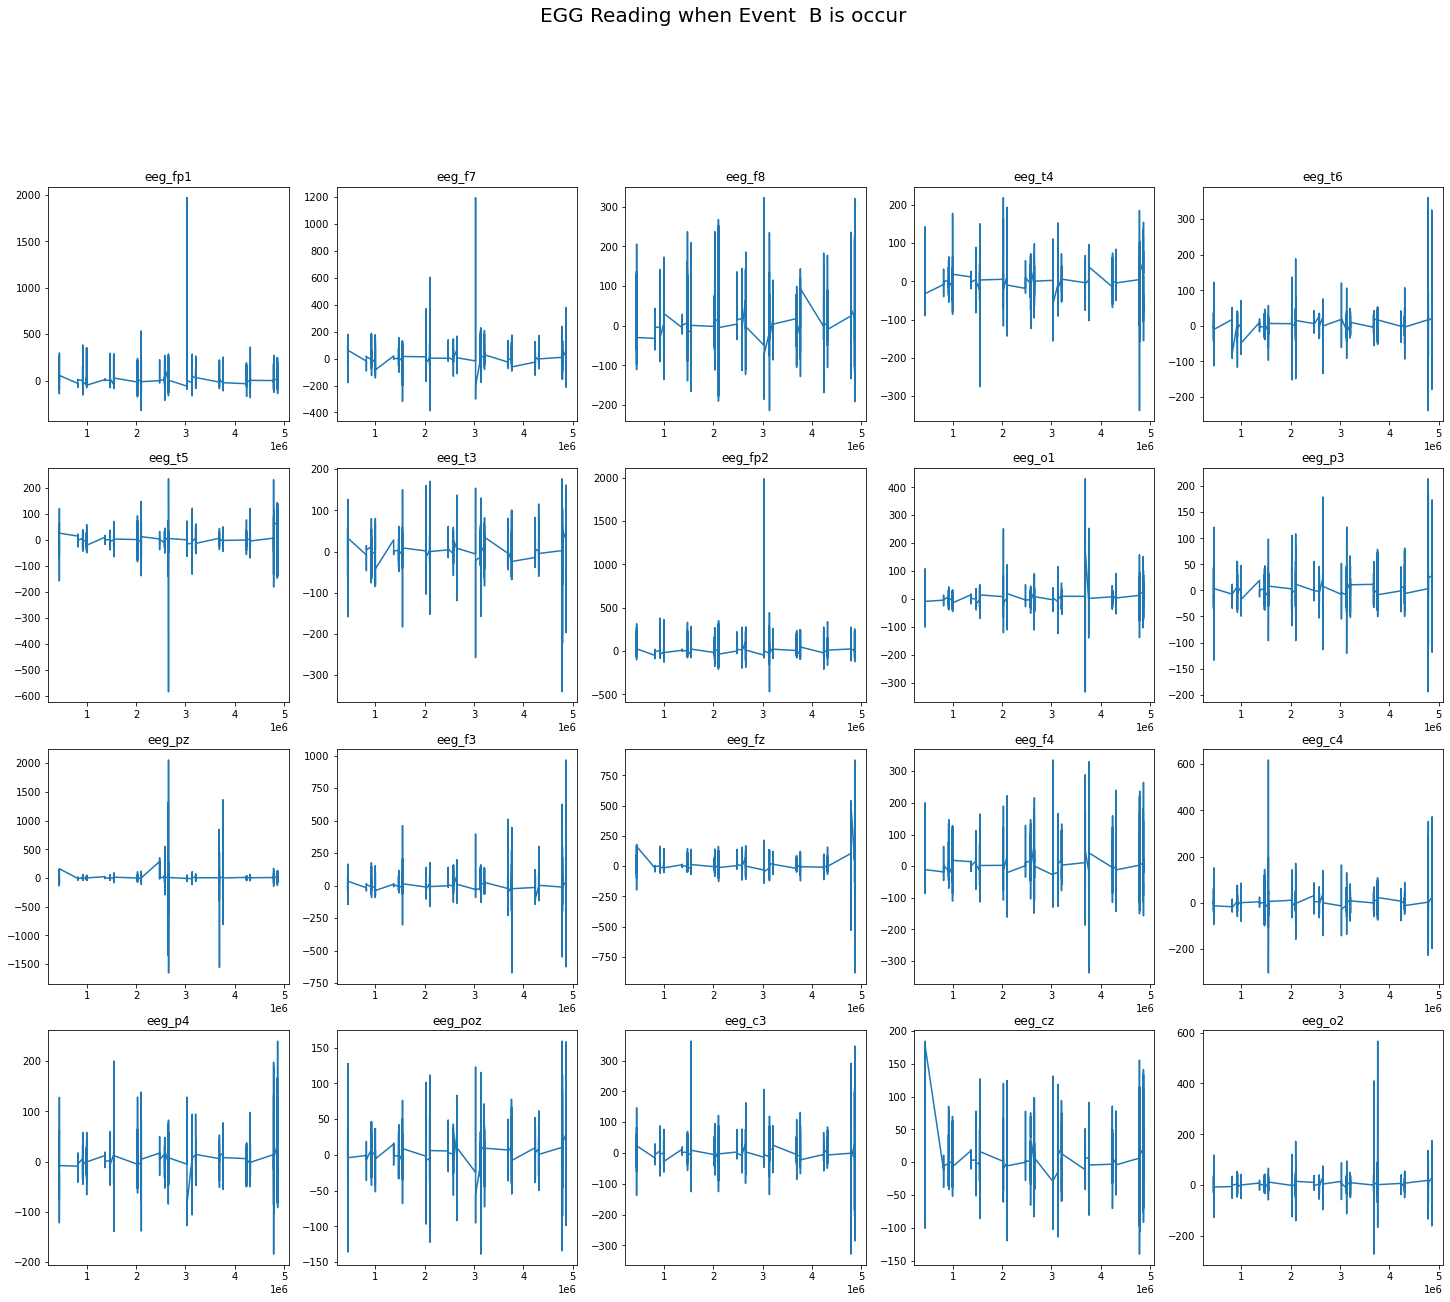

In [ ]:
fig = plt.figure(figsize=(25,25))
for i,egg in enumerate(egg_features):
    plt.subplot(5,5,i+1)
    plt.title(egg)
    plt.plot(train_df.loc[train_df['event']=='B'][egg])
fig.suptitle("EGG Reading when Event  B is occur",fontsize=20)
plt.show()

#### 3.3.4 EGG Signals view when Event C is Occur

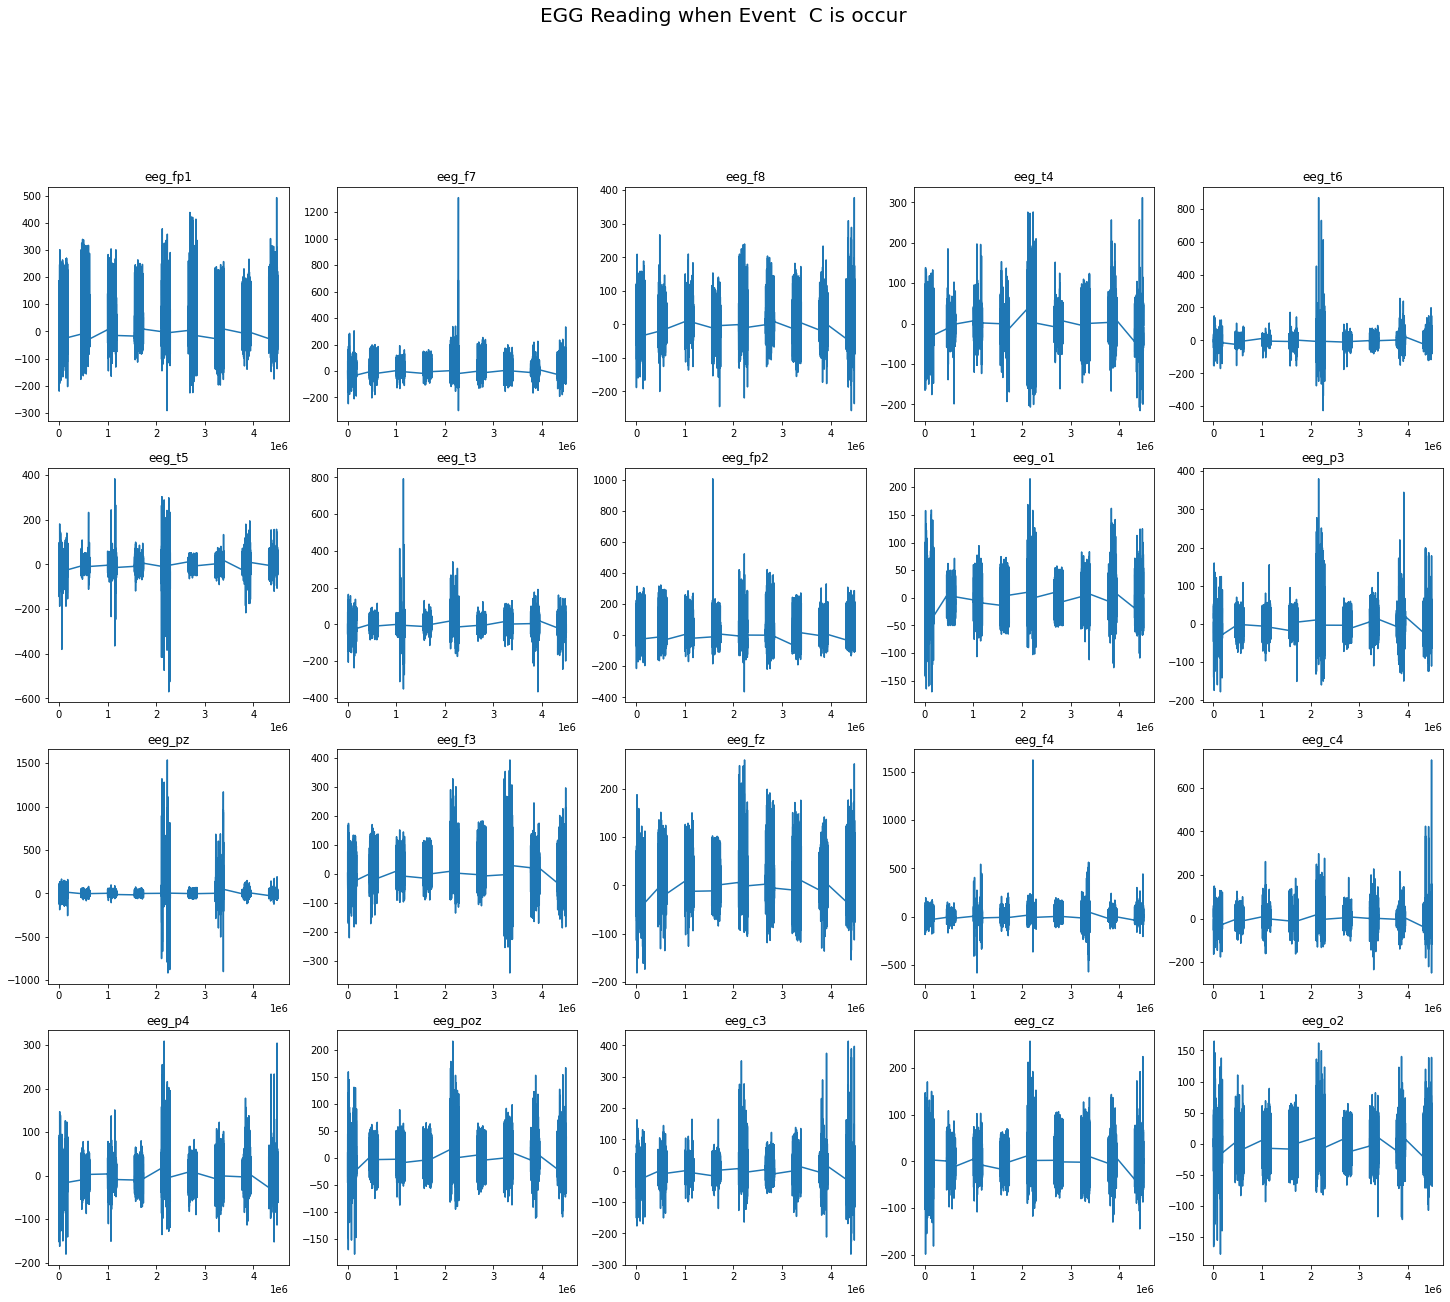

In [ ]:
fig= plt.figure(figsize=(25,25))
plt.title("All EGG Reading Box Plot ",fontsize=20)
for i,egg in enumerate(egg_features):
    plt.subplot(5,5,i+1)
    plt.title(egg)
    plt.plot(train_df.loc[train_df['event']=='C'][egg])
fig.suptitle("EGG Reading when Event  C is occur",fontsize=20)
plt.show()

#### 3.3.5 EGG Signals view when Event D is Occur

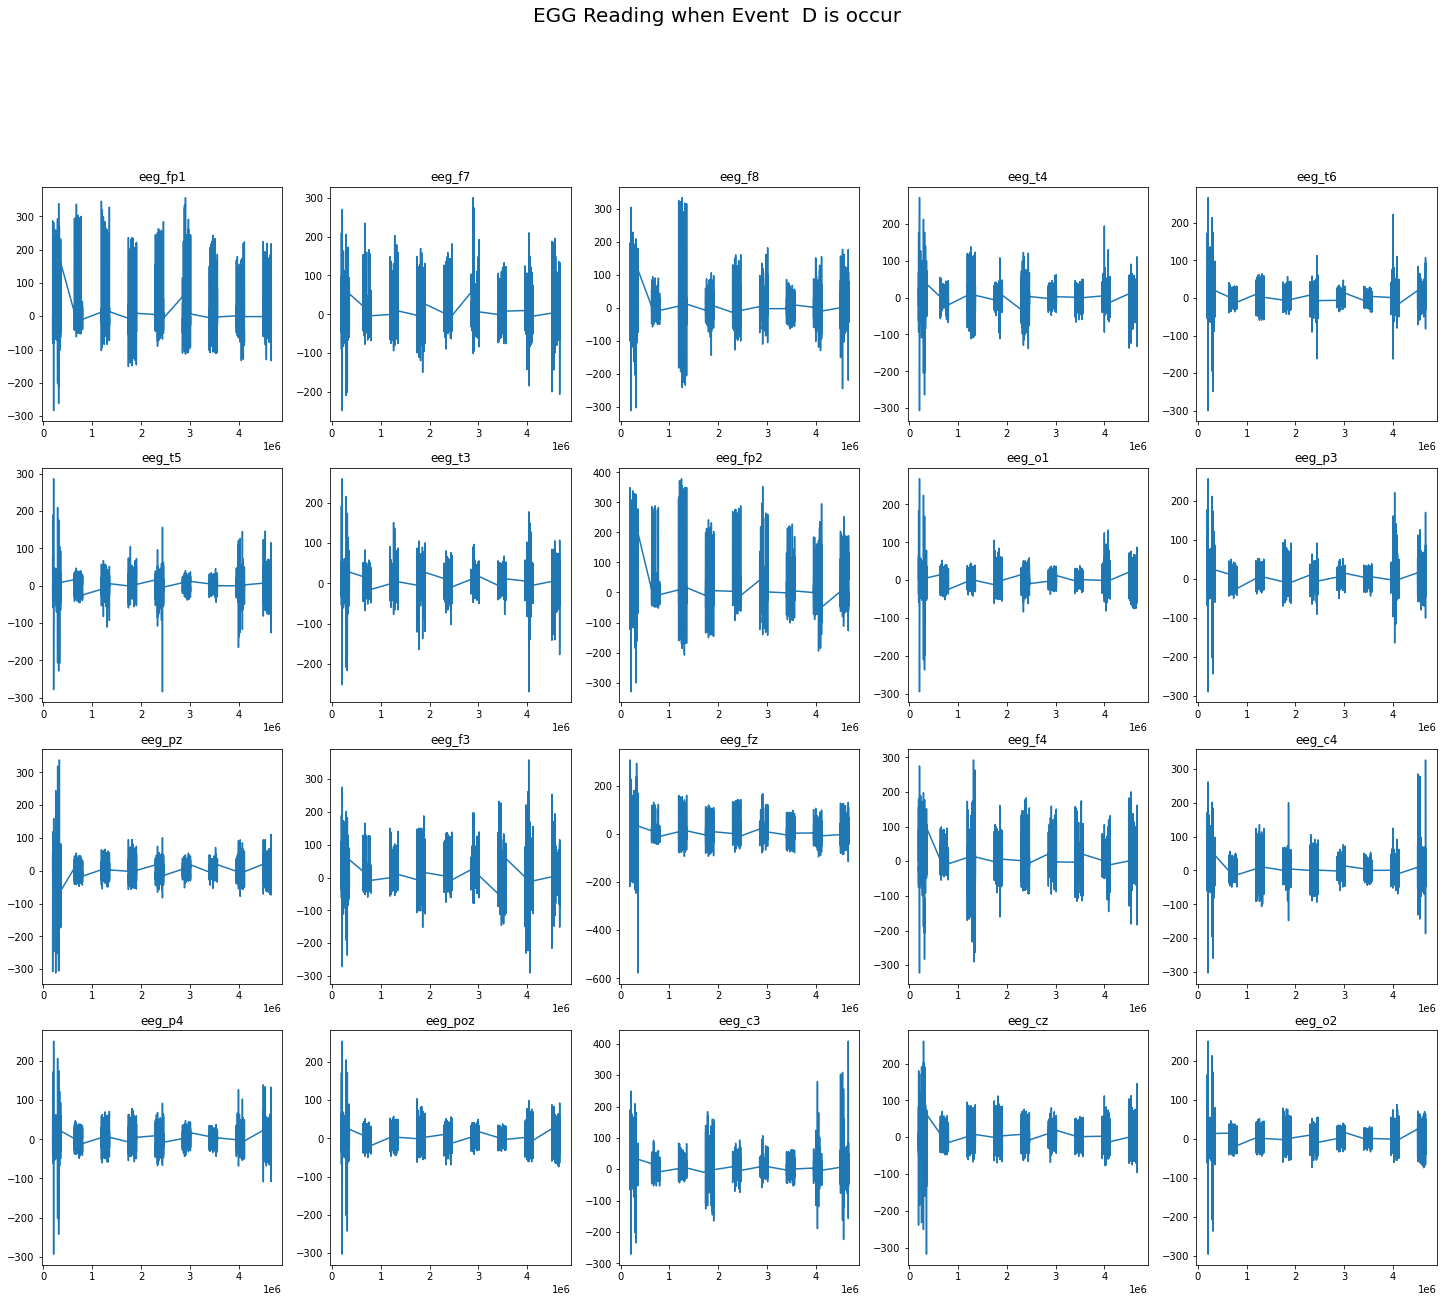

In [ ]:
fig = plt.figure(figsize=(25,25))
for i,egg in enumerate(egg_features):
    plt.subplot(5,5,i+1)
    plt.title(egg)
    plt.plot(train_df.loc[train_df['event']=='D'][egg])
fig.suptitle("EGG Reading when Event  D is occur",fontsize=20)
plt.show()

We have plotted every EGG reading for every event. We can observe that from those plot are below
1. As we know EGG reading taking with 20 electrode which is puttiing different different postion on scalp of head.
2. Based on that,every event reaction There is electrode getting more fluctuate . You can see in below image
3. Event A = Fp1,Fp2,F3,C3,Cz
4. Event B = F8,T4,T3,F4,P4,C2
5. Event C = Fp1,F8,T4,O1,F2,F4,F3,C2,C3
5. Event D = Fp1,Fp2,F3,C4,C3,C2
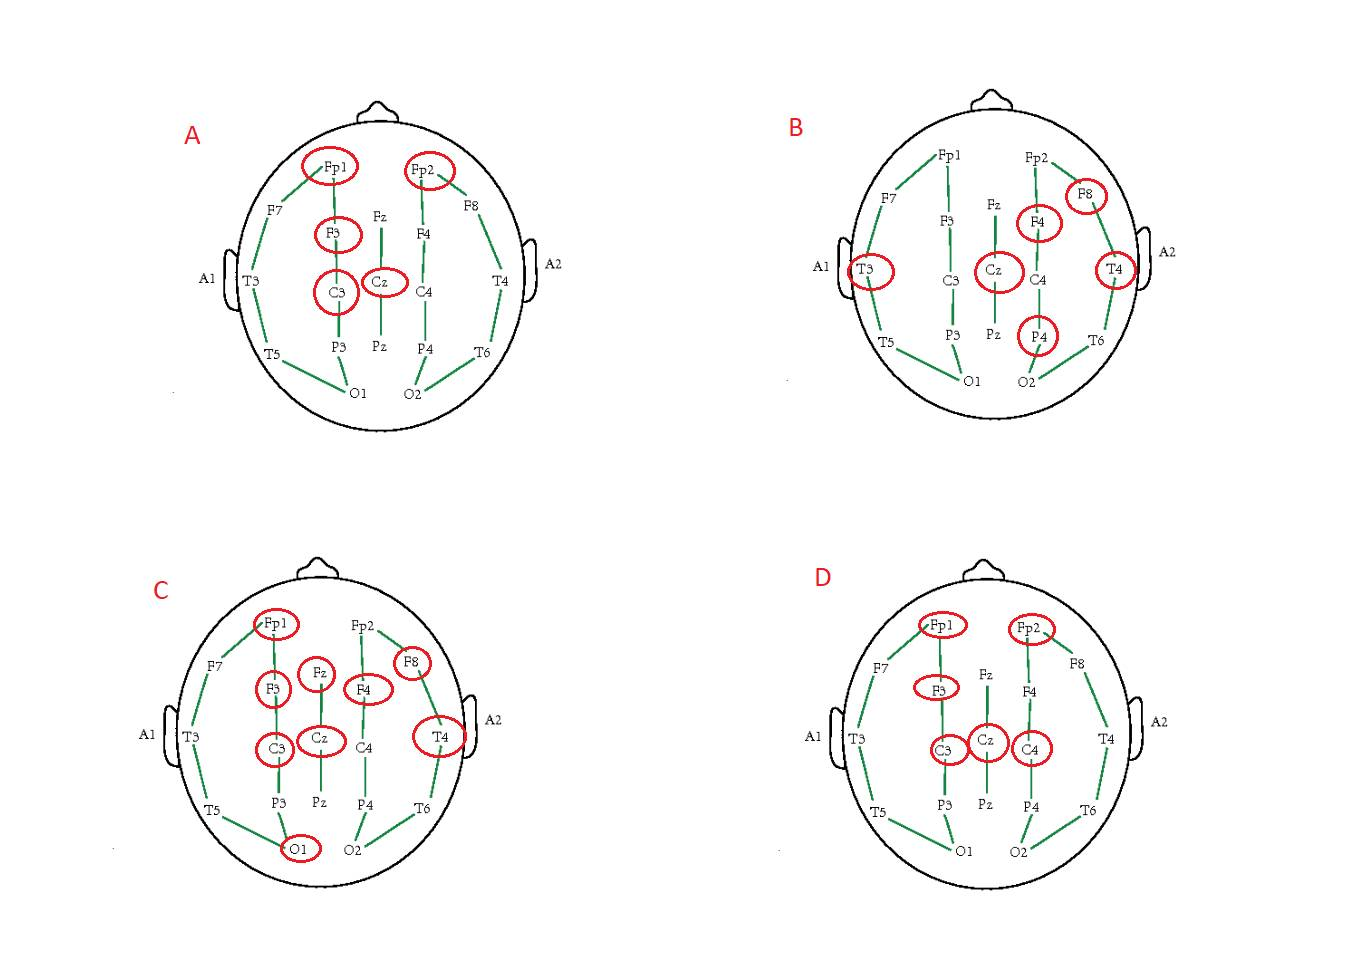


#### 3.3.6 EGG Train and Test distribution plot

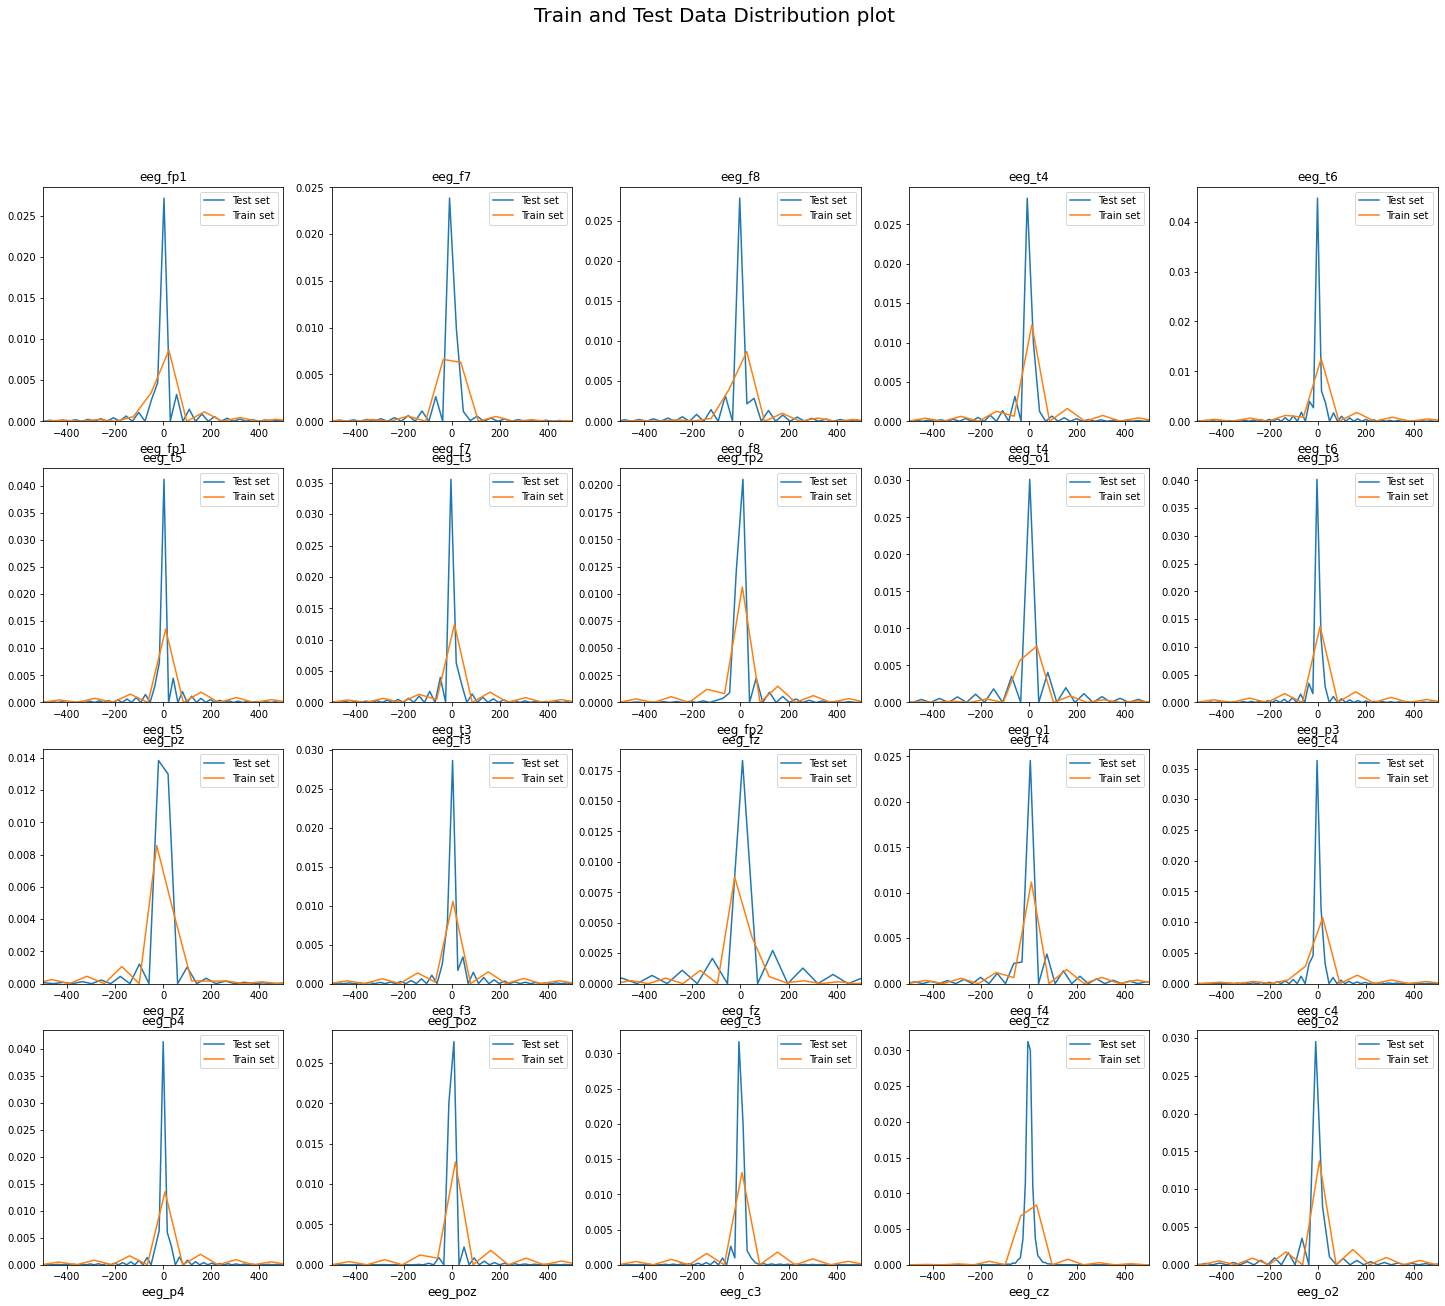

In [ ]:
fig = plt.figure(figsize=(25,25))
for i,egg in enumerate(egg_features):
    plt.subplot(5,5,i+1)
    plt.title(egg)
    sns.distplot(train_df[egg], label='Test set', hist=False)
    sns.distplot(test_df[egg], label='Train set', hist=False)
    plt.xlim((-500, 500))
    plt.legend()
    plt.xlabel(egg, fontsize=12)
fig.suptitle("Train and Test Data Distribution plot ",fontsize=20)
plt.show()

We can see above both Train and Test EGG data follow about to normal distribution but test data have bigger peak at zero(0) and more variance in test data

### 3.4 Electrocardiogram (ECG or EKG)

#### 3.4.1 Violin plot

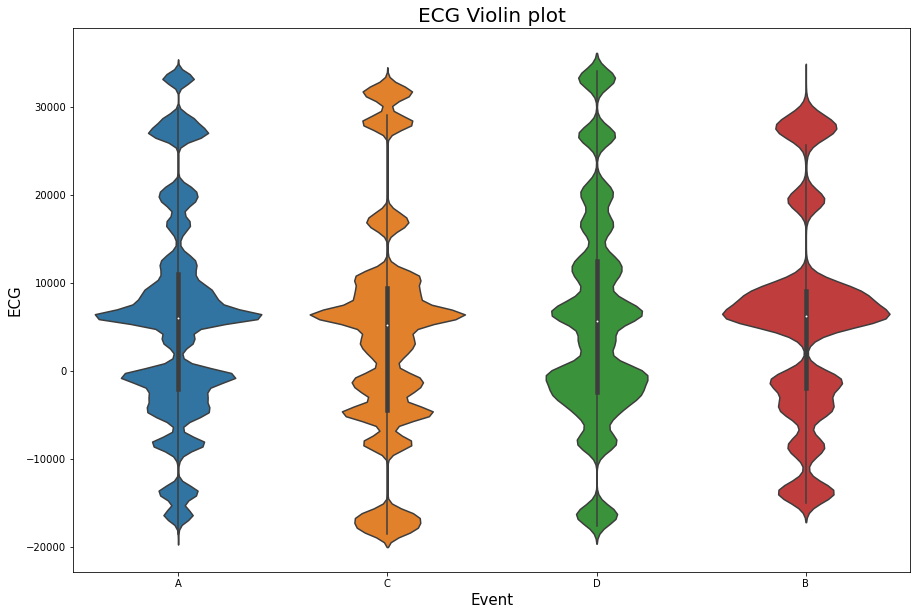

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='ecg', data=train_df)
plt.ylabel("ECG", fontsize=15)
plt.xlabel("Event", fontsize=15)
plt.title("ECG Violin plot", fontsize=20)
plt.show()

From violin plot we can see for every event data is about in same range and same size

In [ ]:
# fig = plt.figure(figsize=(25,10))
events=['A','B','C','D']
for i,event in enumerate(events):
#     fig, axes = plt.subplots(ncols=1, figsize=(15, 5))
#     plt.title(event)
#     plt.plot(train_df.loc[train_df['event']==event]['ecg'],ax=axes[0])
#     plt.tight_layout()
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title('A single plot')

fig.suptitle("EGG Reading when Event  D is occur",fontsize=20)
plt.show()


#### 3.4.2 ECG Signal 

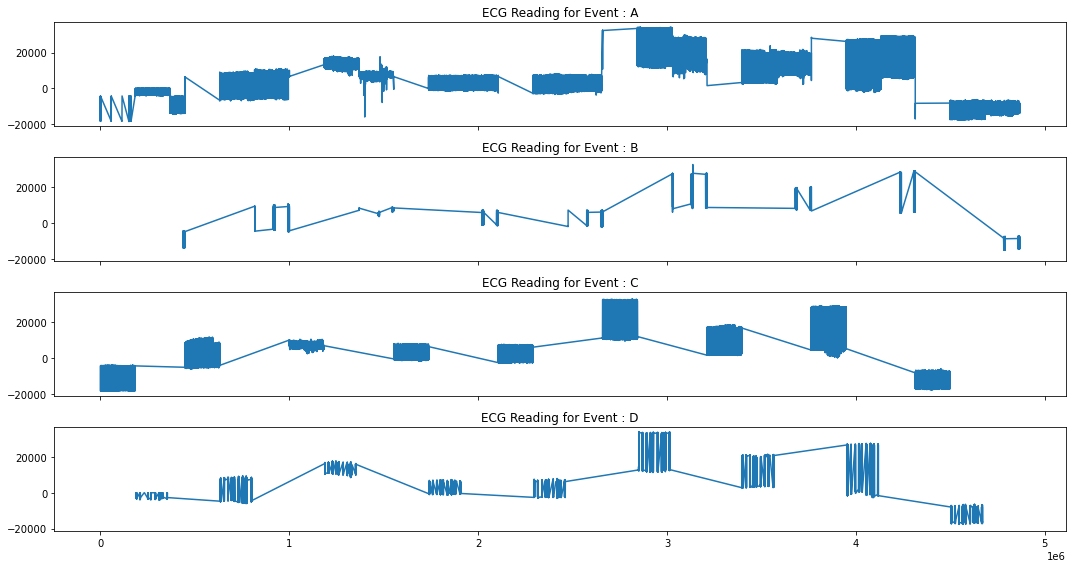

In [ ]:
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(15)
events=['A','B','C','D']
for i,event in enumerate(events):
    axs[i].plot(train_df.loc[train_df['event']==event]['ecg'])
    axs[i].set_title('ECG Reading for Event : {}'.format(event))
fig.tight_layout()    
plt.show()

Every event have different shape as we can easily distinguish 

#### 3.4.3 ECG Train and Test Distribution

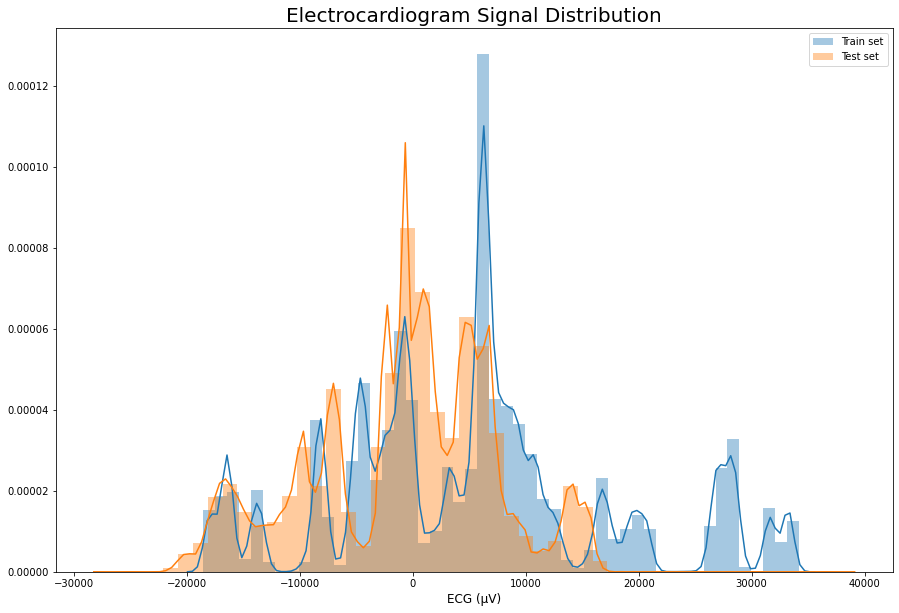

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train_df['ecg'], label='Train set')
sns.distplot(test_df['ecg'], label='Test set')
plt.xlabel("ECG (µV)", fontsize=12)
plt.title("Electrocardiogram Signal Distribution", fontsize=20)
plt.legend()
plt.show()

from above data distribution plot we can understand train and test data overlapping each other.

### 3.5 Respiration

#### 3.5.1 Respiration Violin Plot

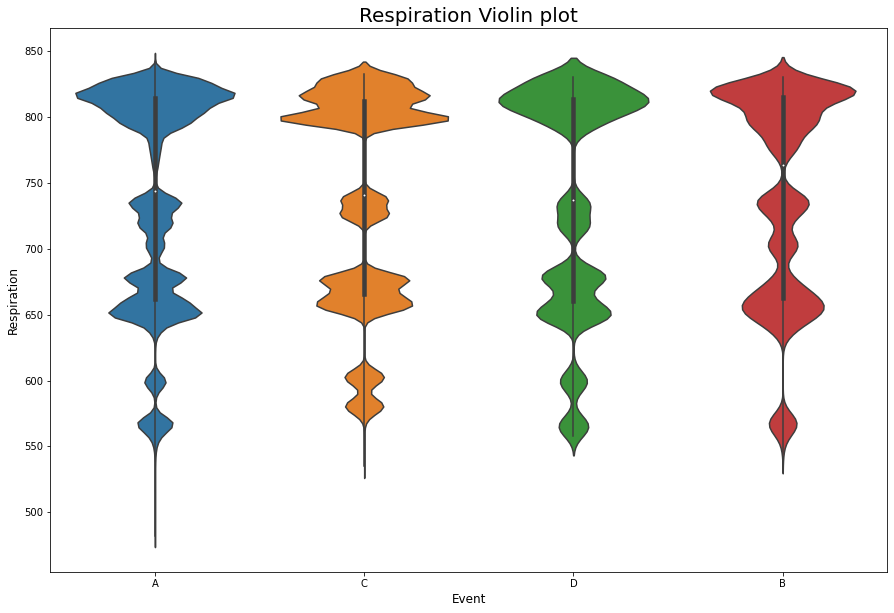

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='r', data=train_df)
plt.ylabel("Respiration", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Respiration Violin plot", fontsize=20)
plt.show()

About same data range found in every event

#### 3.5.2 Respiration Train and Test data  Distribution

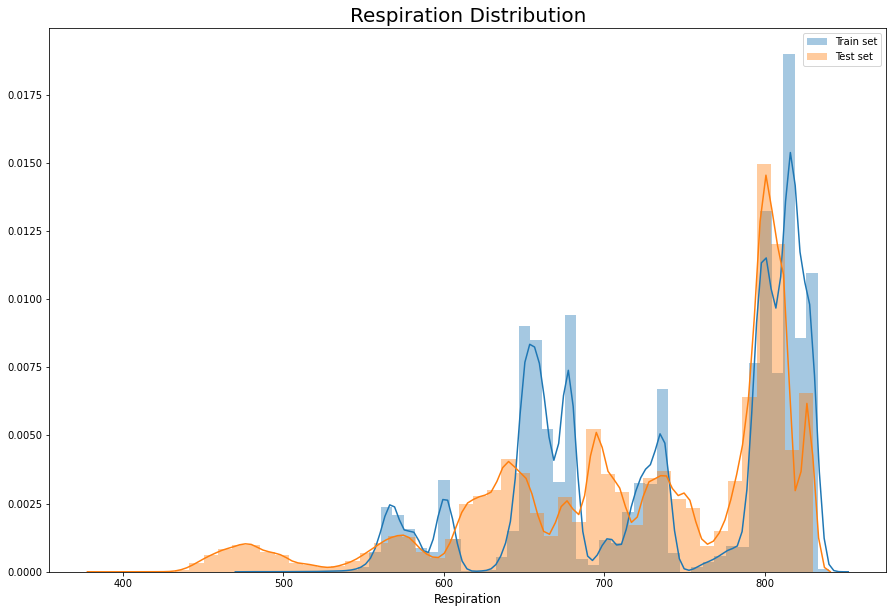

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train_df['r'], label='Train set')
sns.distplot(test_df['r'], label='Test set')
plt.xlabel("Respiration", fontsize=12)
plt.title("Respiration Distribution", fontsize=20)
plt.legend()
plt.show()

Train and Test dataset distribution is about same 

#### 3.5.3 Respiration signal plots

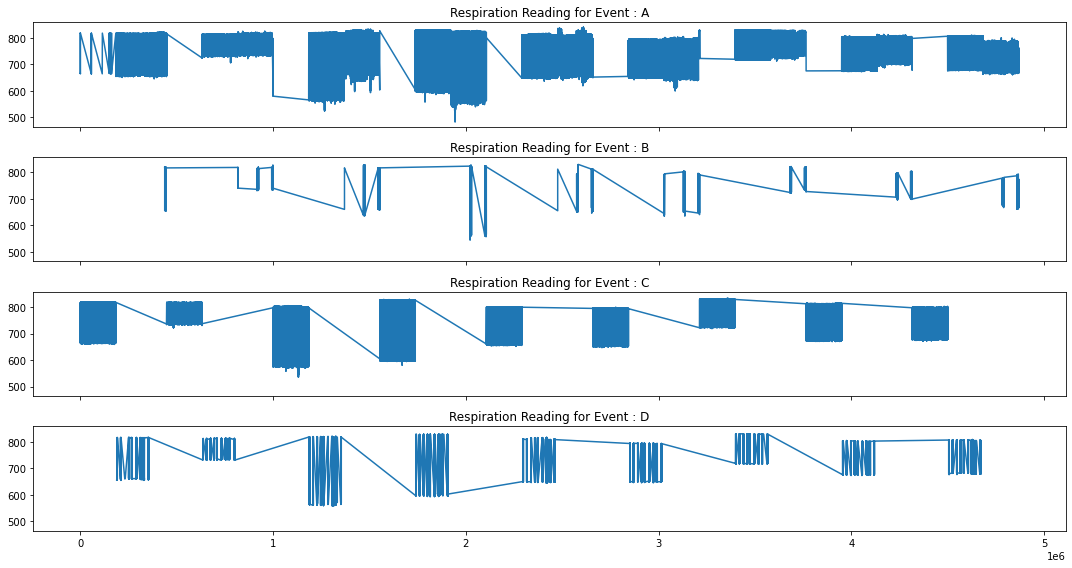

In [ ]:
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(15)
events=['A','B','C','D']
for i,event in enumerate(events):
    axs[i].plot(train_df.loc[train_df['event']==event]['r'])
    axs[i].set_title('Respiration Reading for Event : {}'.format(event))
fig.tight_layout()    
plt.show()

from above all event signal plot is different same as ECG signal plot

### 3.6 Galvanic Skin Response( GSR )

##### 3.6.1 Box Plot

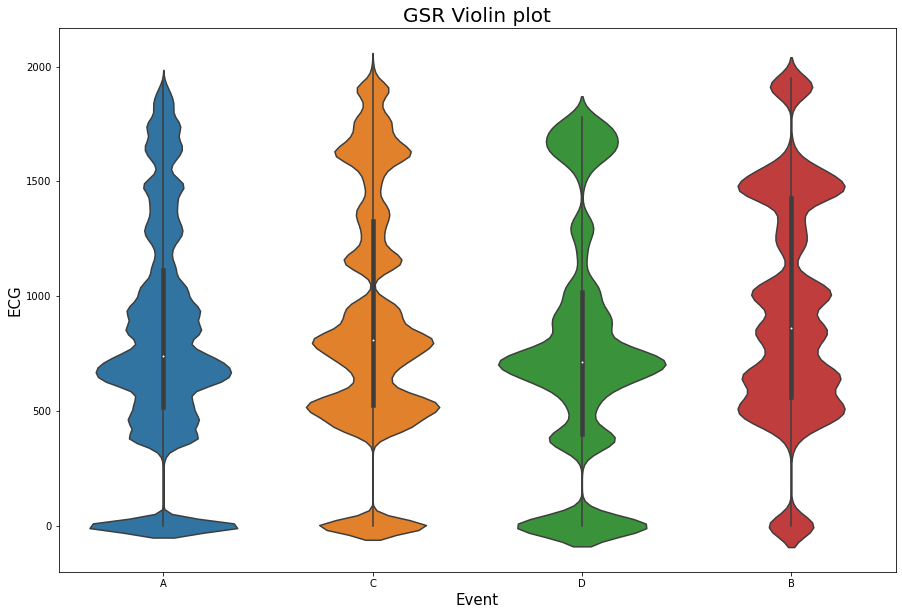

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='gsr', data=train_df)
plt.ylabel("ECG", fontsize=15)
plt.xlabel("Event", fontsize=15)
plt.title("GSR Violin plot", fontsize=20)
plt.show()

GSR data is also about same for every Event

##### 3.6.2 GSR Signal plots

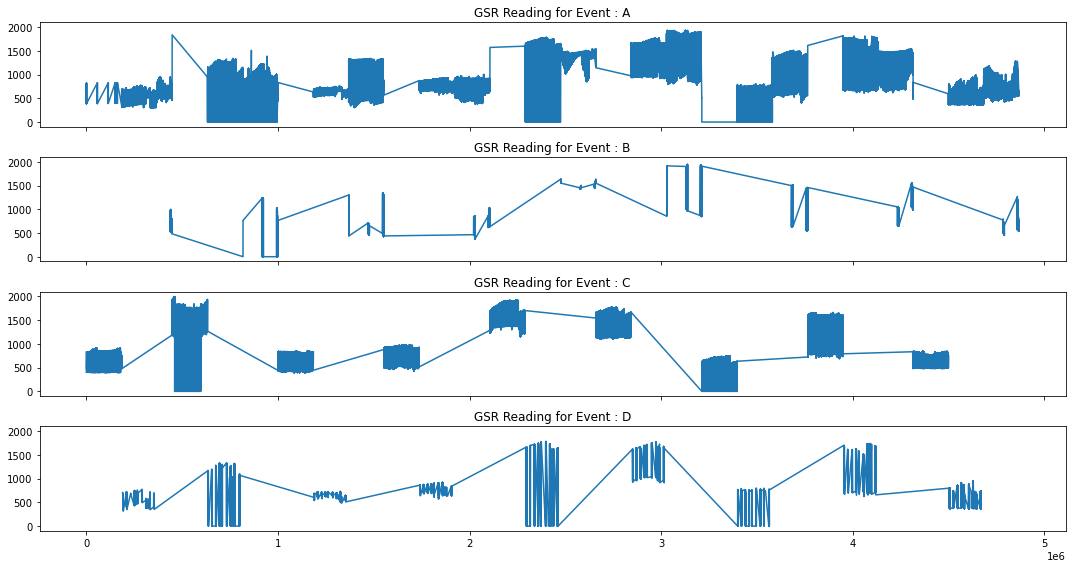

In [ ]:
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(15)
events=['A','B','C','D']
for i,event in enumerate(events):
    axs[i].plot(train_df.loc[train_df['event']==event]['gsr'])
    axs[i].set_title('GSR Reading for Event : {}'.format(event))
fig.tight_layout()    
plt.show()

This is same plot as ECG 

##### 3.6.3 GSR Train and Test Distribution Plot

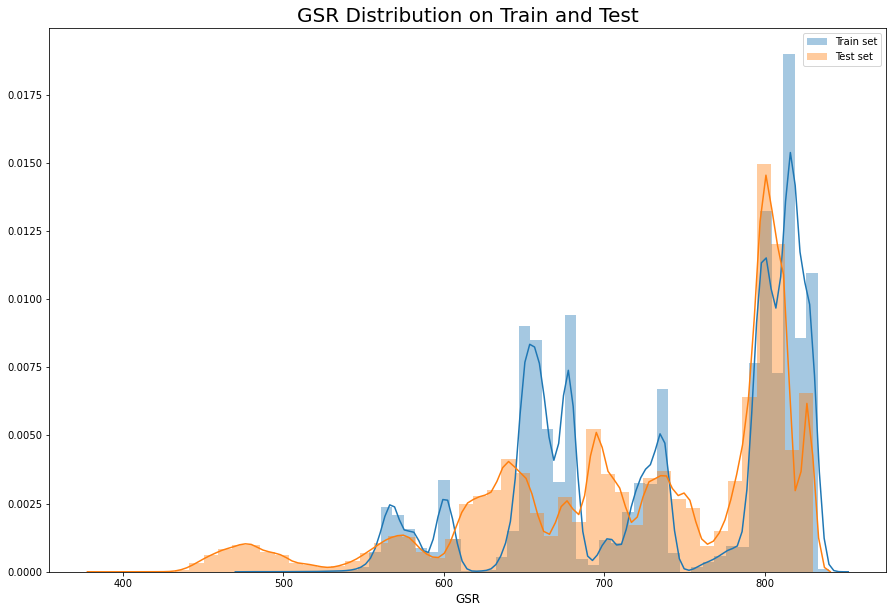

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train_df['r'], label='Train set')
sns.distplot(test_df['r'], label='Test set')
plt.xlabel("GSR", fontsize=12)
plt.title("GSR Distribution on Train and Test", fontsize=20)
plt.legend()
plt.show()

On above plot we can see train and test data about same distributed 

# Observation from EDA

1. Data is completely imbalanced so we have to oversample or undersample dataset before train.
2. Time in Train and Test dataset is completely different distribution so use of this in train may our prediction in wrong direction.
3. EGG Reading violin plot is about same for every event,if we see EGG signal plot we will differnet between every event on differenet -different electrod on scalp.
4. ECG violin plot have about same data we are not getting much information from that but if we see signal reading plots which show as different for every event.
5. Respiration and GSR have about same story as ECG and EGG plots